## COMP 484 Lab 6
Srishan Shakya

Roll No. 46

CE


# <u>Aritificial Neural Networks</u>

## Building a Perceptron based classifier

A **Perceptron** is the building block of an artificial neural network. It is a single neuron that takes input, performs computation on them, and then produces an output. It uses a simple linear function to make the decision. These simple Perceptrons are used to design very complex deep neural networks.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [2]:
# Load input data from downloaded txt file
text = np.loadtxt('data_perceptron.txt')

In [3]:
text # Each line contains space separated numbers where first two are features and last number is the label

array([[0.38, 0.19, 0.  ],
       [0.17, 0.31, 0.  ],
       [0.29, 0.54, 0.  ],
       [0.89, 0.55, 1.  ],
       [0.78, 0.36, 1.  ]])

In [4]:
# Separate text into datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input Data')

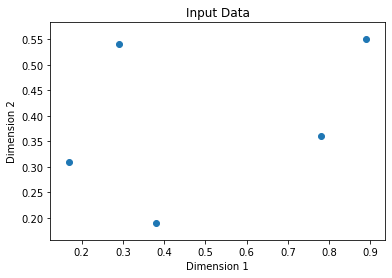

In [5]:
# Plot the datapoints
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [6]:
# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [7]:
# Data is separated into two classes so we need just one bit to represent the output.
# Therefore, Number of neurons in the output layer is 1
num_output = labels.shape[1]

In [8]:
# We have a dataset where datapoints are 2D. So, perceptron needs two input neurons, one for each dimension.
# Define a perceptron with 2 input neurons
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output) # p: one layer perceptron

In [9]:
# Train the perceptron with the training data
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03) #lr = learning rate

The goal of learning is reached


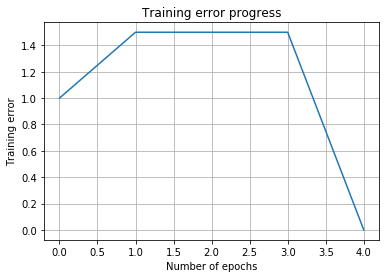

In [10]:
# Plot the training progress using error metric
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

We can observe that the error goes down to **0** at the end of the fourth epoch.

## Constructing a single layer neural network

A perceptron is a good start, but it cannot do much. The next step is to have a set of neurons act as a unit to see what we can achieve. Here, we create a single neural network that consist of independent neurons acting on input data to produce the output.

In [11]:
# Load input data from data_simple_nn.txt
# Each line has four numbers. First two form fatapoint and last two are labels.
# Two numbers for labels is because we have 4 distinct classes so we need two bits to represent them.

text = np.loadtxt('data_simple_nn.txt')
print(text)

[[1.  4.  0.  0. ]
 [1.1 3.9 0.  0. ]
 [1.2 4.1 0.  0. ]
 [0.9 3.7 0.  0. ]
 [7.  4.  0.  1. ]
 [7.2 4.1 0.  1. ]
 [6.9 3.9 0.  1. ]
 [7.1 4.2 0.  1. ]
 [4.  1.  1.  0. ]
 [4.1 0.9 1.  0. ]
 [4.2 1.1 1.  0. ]
 [3.9 0.8 1.  0. ]
 [4.  7.  1.  1. ]
 [4.2 7.2 1.  1. ]
 [3.9 7.1 1.  1. ]
 [4.1 6.8 1.  1. ]]


In [12]:
# Separate into datapoints and labels

data = text[:, :2]
labels = text[:, 2:]

Text(0.5, 1.0, 'Input data: simple NN')

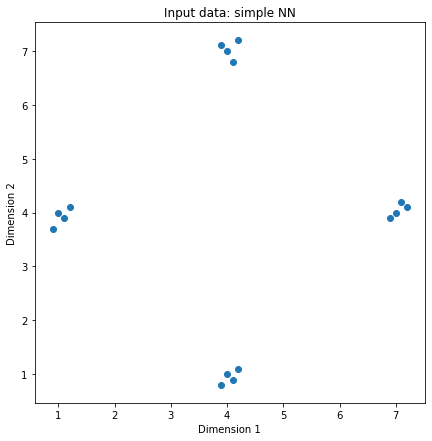

In [13]:
# Plot input data
plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data: simple NN')

In [14]:
# Extract minimum and maximum values for each  dimension
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

In [15]:
# Define number of neurons in the output layer
num_output = labels.shape[1] # returns 2

In [16]:
# Define a single-layer neural network using above parameters
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output) # p: one layer perceptron

In [17]:
# Train the neural network using training data
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


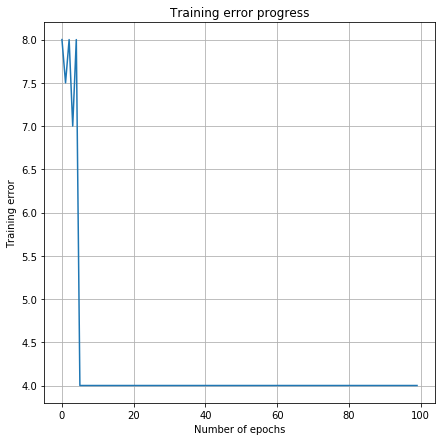

In [18]:
# Plot the training progress
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

In [19]:
# Run the classifier on sample test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


We can visually verify the predicted outputs are correct by locating the test data points on a 2D graph.

## Constructing a multilayer neural network

In order to enable higher accuracy, we need to give more freedom to the neural network.
This means that a neural network needs more than one layer to extract the underlying patterns in the training data.
Previously we used neural network as a classifier. Here, we will use a multilayer neural network as a regressor.

In [20]:
# Generate some training data based on the equation y = 3x^2 + 5 and then normalize the points
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [21]:
# Reshape above variables to create data and labels for training dataset
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

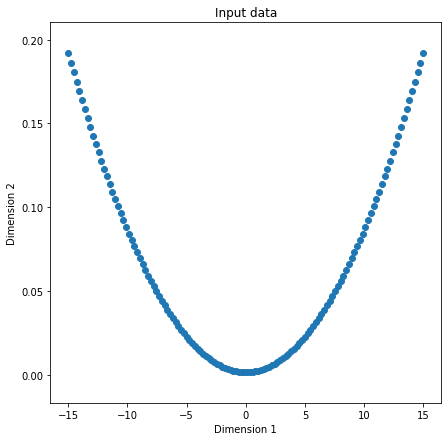

In [22]:
# Plot the created input data
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [23]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron as our task is to predict the value
# Note: The number of neurons in hidden layers can be changed freely
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])  # ff: Multilayer Perceptron

In [24]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [25]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.005)

Epoch: 100; Error: 1.6560175580187209;
Epoch: 200; Error: 0.507473271908389;
Epoch: 300; Error: 0.03727976051476911;
Epoch: 400; Error: 0.2531243309083165;
Epoch: 500; Error: 0.0377718371456835;
Epoch: 600; Error: 0.054862144692779266;
Epoch: 700; Error: 0.06134665390580152;
Epoch: 800; Error: 0.08485887696743238;
Epoch: 900; Error: 0.09192238608959474;
Epoch: 1000; Error: 0.04214809094204587;
Epoch: 1100; Error: 0.054138399889710136;
Epoch: 1200; Error: 0.05057153673176157;
Epoch: 1300; Error: 0.0264289642072306;
Epoch: 1400; Error: 0.026873649169043768;
Epoch: 1500; Error: 0.009926426391609598;
Epoch: 1600; Error: 0.018819912020742013;
Epoch: 1700; Error: 0.04234276530916524;
Epoch: 1800; Error: 0.0076567271931275264;
Epoch: 1900; Error: 0.014302420893611119;
Epoch: 2000; Error: 0.006735804957535292;
The maximum number of train epochs is reached


In [26]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

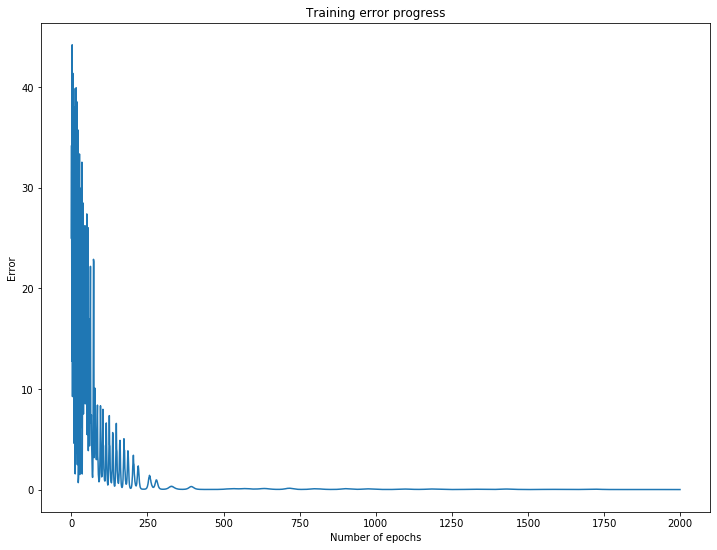

In [27]:
# Plot the training error progress
plt.rcParams['figure.figsize'] = [12, 9]

plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

Text(0.5, 1.0, 'Actual vs predicted')

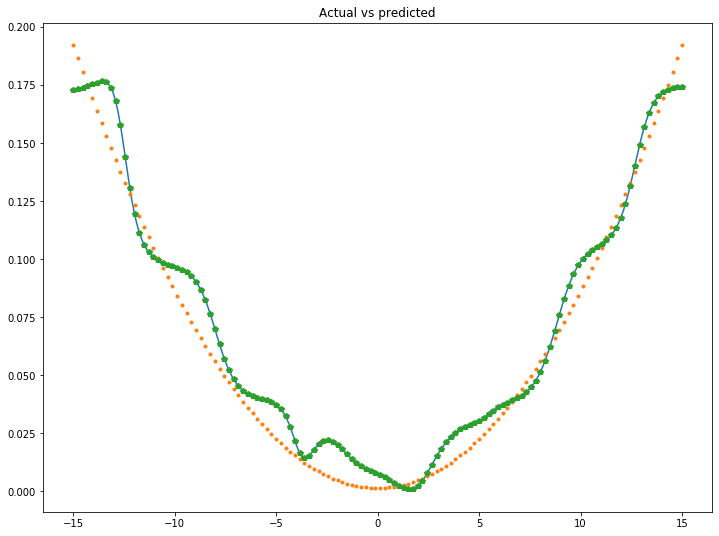

In [28]:
# Plot the predicted output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

In [29]:
# Additional test neural network with 12, 8, 4 neurons in 3 hidden layers
nn_3 = nl.net.newff([[min_val, max_val]], [12, 8, 4, 1])
nn_3.trainf = nl.train.train_gd
error_progress_3 = nn_3.train(data, labels, epochs=2500, show=100, goal=0.001)

output = nn_3.sim(data)
y_pred = output.reshape(num_points)

Epoch: 100; Error: 0.05250221003031949;
Epoch: 200; Error: 0.028451143467006636;
Epoch: 300; Error: 0.018749392159268265;
Epoch: 400; Error: 0.01308012553418715;
Epoch: 500; Error: 0.07543922926609123;
Epoch: 600; Error: 0.007899279613143802;
Epoch: 700; Error: 0.0063591903329596;
Epoch: 800; Error: 0.032023184781180575;
Epoch: 900; Error: 0.007243810457155634;
Epoch: 1000; Error: 0.004570443024427246;
Epoch: 1100; Error: 0.007371940826187792;
Epoch: 1200; Error: 0.017883040587320674;
Epoch: 1300; Error: 0.005126304013950635;
Epoch: 1400; Error: 0.00471526686552023;
Epoch: 1500; Error: 0.010259217558081134;
Epoch: 1600; Error: 0.009263433325102646;
Epoch: 1700; Error: 0.004884649286293298;
Epoch: 1800; Error: 0.005260642957251897;
Epoch: 1900; Error: 0.008514439014992563;
Epoch: 2000; Error: 0.007192229784688844;
Epoch: 2100; Error: 0.004880029948684853;
Epoch: 2200; Error: 0.004984617353683208;
Epoch: 2300; Error: 0.006472444519295337;
Epoch: 2400; Error: 0.006326564043669705;
Epoch: 

Text(0.5, 1.0, 'Training error progress with 3 hidden layers')

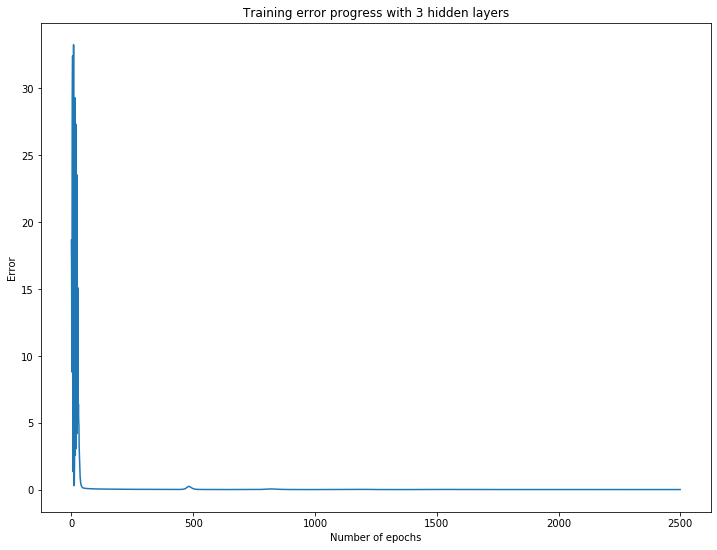

In [30]:
# Plot of training error progress with 3 hidden layers
plt.plot(error_progress_3)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress with 3 hidden layers')

Text(0.5, 1.0, 'Actual vs predicted')

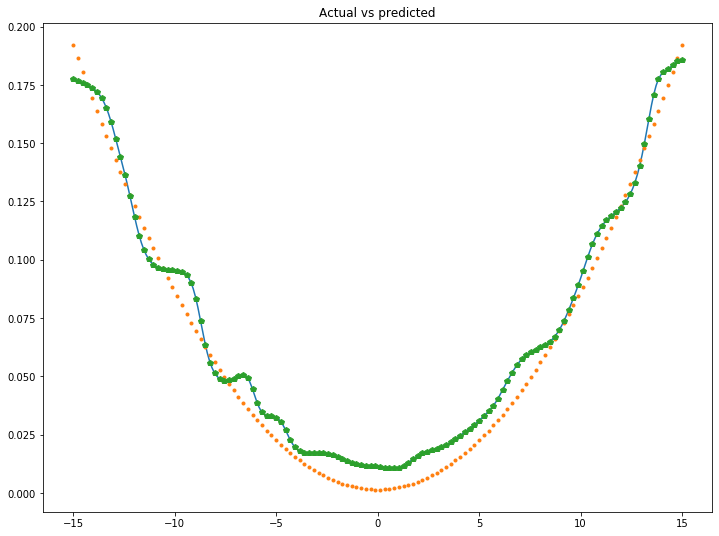

In [31]:
# Plot the predicted output of Neural Network with 3 hidden layers
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn_3.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

## Building a vector quantizer

**Vector Quantization** is a quantization technique where input data is represented by a fixed number of representative points. It is the N-dimensional equivalent of rounding off a number. This technique is commonly used in image recognition, semantic analysis, data science, etc. Here, we use artificial neural networks to build a vector quantizer.

In [32]:
# Load input data.
# Each line in this file contains six numbers.
# First 2 form the datapoint. last 4 form a one-hot encoded label.
# Total of 4 classes

text = np.loadtxt('data_vector_quantization.txt')
print(text)

[[0.9 5.1 1.  0.  0.  0. ]
 [1.2 4.8 1.  0.  0.  0. ]
 [1.  4.9 1.  0.  0.  0. ]
 [0.8 5.2 1.  0.  0.  0. ]
 [8.  4.1 0.  1.  0.  0. ]
 [8.2 4.3 0.  1.  0.  0. ]
 [7.9 3.8 0.  1.  0.  0. ]
 [8.3 4.3 0.  1.  0.  0. ]
 [5.  1.1 0.  0.  1.  0. ]
 [5.1 0.8 0.  0.  1.  0. ]
 [5.3 1.2 0.  0.  1.  0. ]
 [4.9 0.9 0.  0.  1.  0. ]
 [5.  7.  0.  0.  0.  1. ]
 [5.2 7.2 0.  0.  0.  1. ]
 [4.9 7.1 0.  0.  0.  1. ]
 [5.1 6.8 0.  0.  0.  1. ]]


In [33]:
# Separate into data and labels
data = text[:, :2]
labels = text[:, 2:]

In [34]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights) # lvq: Learning Vector Quantization(LVQ)

In [35]:
# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

# Create the input grid to visualize the output clusters
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

# Evaluate the input grid of points using the neural network
grid_eval = nn.sim(grid_xy)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [36]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

Text(0.5, 1.0, 'Vector quantization')

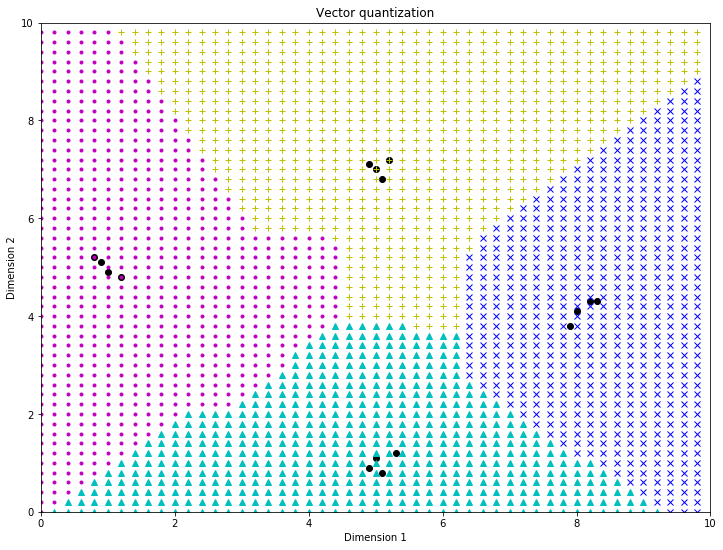

In [37]:
# Plot the outputs

plt.plot(class_1[:,0], class_1[:,1], 'ko', 
        class_2[:,0], class_2[:,1], 'ko', 
        class_3[:,0], class_3[:,1], 'ko', 
        class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^', 
        grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

## Analyzing sequential data using recurrent neural networks

We have been dealing with static data so far. Artificial neural networks are good at building models for sequential data too. In particular, recurrent neural networks are great at modeling sequential data. Perhaps time-series data is the most commonly occurring form of sequential data in our world. We can learn more about recurrent neural networks [here](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns). When we are working with time-series data, we cannot just use generic learning models. We need to characterize the temporal dependencies in our data so that we can build a robust model.

In [38]:
# Define a function to generate waveforms using for sine waves:
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    # Create varying amplitudes for the overall waveform:
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    # Create the overall waveform:
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
    
    return wave, amp

In [39]:
# Define function to visualize the output of NN:
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

In [40]:
# Create some sample data and waveform
num_points = 40
wave, amp = get_data(num_points)

# Create a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()]) # elm: Elman Recurrent Network

# Set the init functions for each layer 
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

# Train the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

# Run the training data through the network
output = nn.sim(wave)

Epoch: 100; Error: 1.1676332981248376;
Epoch: 200; Error: 0.17994578347853732;
Epoch: 300; Error: 0.0728436673185742;
Epoch: 400; Error: 0.05651700304916753;
Epoch: 500; Error: 0.05150600921401458;
Epoch: 600; Error: 0.048344388217957016;
Epoch: 700; Error: 0.043623767855485523;
Epoch: 800; Error: 0.04234160349342956;
Epoch: 900; Error: 0.038457149784713;
Epoch: 1000; Error: 0.03760178709886065;
Epoch: 1100; Error: 0.03587910923344791;
Epoch: 1200; Error: 0.03283572541845142;
The maximum number of train epochs is reached


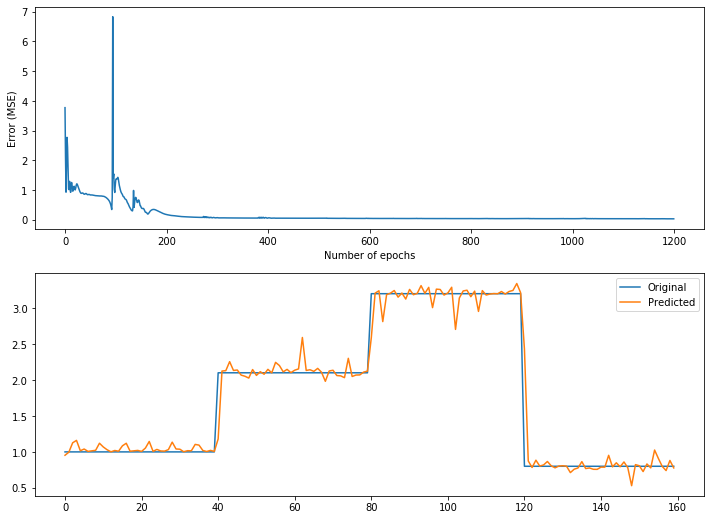

In [41]:
# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)') # MSE: Mean Squared Error
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

(0, 300)

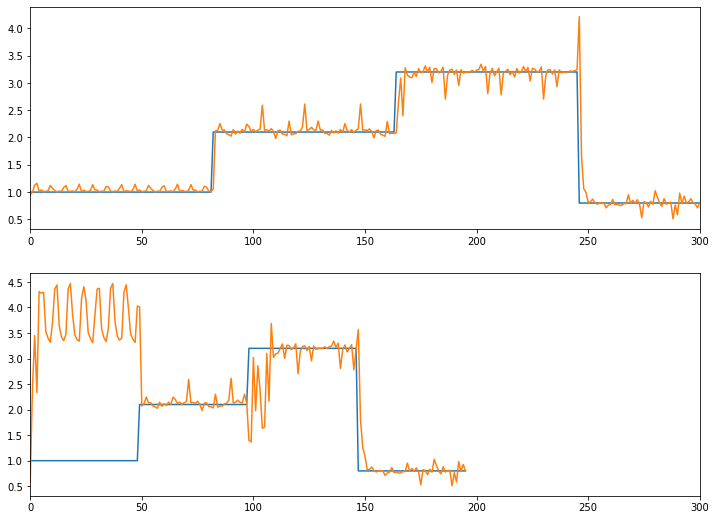

In [42]:
# Testing the neural network performance on unknown data

plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])

## Visualizing characters in an Optical Character Recognition database

**Optical Character Recognition (OCR)** is the process of recognizing handwritten characters in images.

In [43]:
import os
import sys

import cv2

In [44]:
# Define input file containing the OCR data
input_file = 'letter.data'

In [45]:
# Define visualization and other parameters required to load the data
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

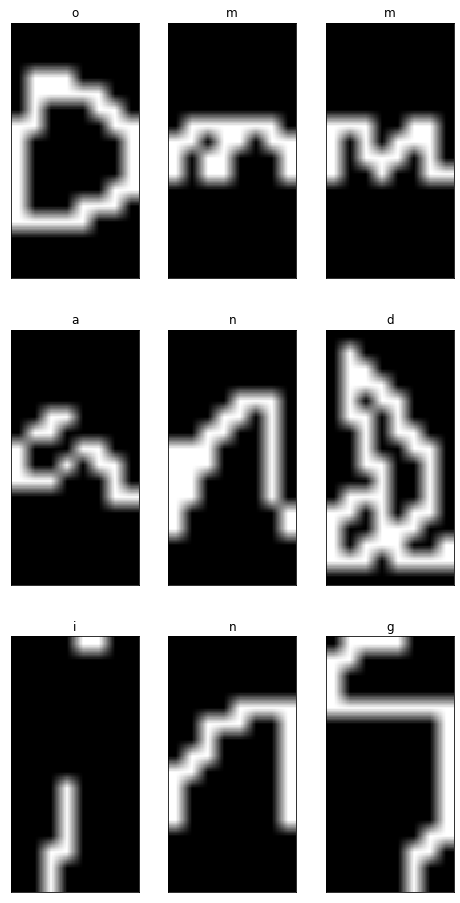

In [46]:
subplotCount = 331 # A 3x3 subplot shows 9 images
plt.rcParams['figure.figsize'] = [8, 16]
plt.gray()

# Iterate until 9 images. Each line in the file is tab separated. Read each line and scale it up to 255:
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])
        label = line.split('\t')[1]
        # Reshape the 1D array into a 2D image
        img = np.reshape(data, (height, width))
        # Scale the image for visualization
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)
        # Display the first 9 images
        plt.subplot(subplotCount)
        plt.imshow(img_scaled)
        plt.title(label)
        plt.xticks([]), plt.yticks([])
        if (subplotCount != 339):
            subplotCount += 1
        else:
            break

## Building an Optical Character Recognition engine

In [47]:
# Import numpy and neurolab if not imported
# Define input file
input_file = 'letter.data'
# Define number of datapoints to be loaded from the input file
num_datapoints = 100
# Define the string containing all the distinct characters:
orig_labels = 'omandig'
# Compute number of distinct characters/classes
num_orig_labels = len(orig_labels)

In [48]:
# Define the train and test split. 90% for training 10% for testing
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [49]:
# Define the dataset extraction parameters
start = 6 # 0's and 1's defining the image starts at index 6 of each line
end = -1

In [50]:
# Creating the dataset
data = []
labels = []
with open (input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
        # Check if label is in our ground truth labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue
        # Extract the current label and append it to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)
        # Exit the loop once the required dataset has been created
        if len(data) >= num_datapoints:
            break

# Convert the lists into numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

In [51]:
# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [52]:
# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=-1)

Epoch: 100; Error: 269.98032743752657;
Epoch: 200; Error: 269.96202942249454;
Epoch: 300; Error: 269.9558786191792;
Epoch: 400; Error: 289.89866941692344;
Epoch: 500; Error: 269.9934926650529;
Epoch: 600; Error: 269.9924378145645;
Epoch: 700; Error: 269.9908169904586;
Epoch: 800; Error: 269.987881511106;
Epoch: 900; Error: 269.98014664601703;
Epoch: 1000; Error: 269.71937331033325;
Epoch: 1100; Error: 269.8677766846947;
Epoch: 1200; Error: 269.93751825653044;
Epoch: 1300; Error: 269.459811531339;
Epoch: 1400; Error: 214.50504026427046;
Epoch: 1500; Error: 223.6194636155517;
Epoch: 1600; Error: 207.01357630628542;
Epoch: 1700; Error: 155.9000341521435;
Epoch: 1800; Error: 118.57277913696434;
Epoch: 1900; Error: 87.28313806030327;
Epoch: 2000; Error: 56.8229711187044;
Epoch: 2100; Error: 36.12365219966151;
Epoch: 2200; Error: 36.894993187022834;
Epoch: 2300; Error: 34.964612679664825;
Epoch: 2400; Error: 34.492505650412454;
Epoch: 2500; Error: 34.95506978856729;
Epoch: 2600; Error: 29.67

In [53]:
# Predict the output for test inputs 
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
right = 0
wrong = 0
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])
    if orig_labels[np.argmax(labels[i])] == orig_labels[np.argmax(predicted_test[i])]:
        right += 1
    else:
        wrong += 1

print("\nAs we can see above, the model correctly predicts", right, "out of", right + wrong, "test characters.")


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: m

Original: m
Predicted: m

Original: a
Predicted: o

Original: n
Predicted: a

Original: d
Predicted: d

Original: i
Predicted: i

Original: n
Predicted: n

Original: g
Predicted: g

Original: o
Predicted: o

As we can see above, the model correctly predicts 8 out of 10 test characters.


# Machine Learning with Python in 6 steps

## Recurrent Neural Network (RNN)

The MLP (feedforward network) is not known to do well on sequential events models such as the probabilistic language model of predicting the next word based on the previous word at every given point. RNN architecture addresses this issue. It is similar to MLP except that they have a feedback loop, which means they feed previous time steps into the current step. This type of architecture generates sequences to simulate situation and create synthetic data, making them the ideal modeling choice to work on sequence data such as speech text mining, image captioning, time series prediction, robot control, language modeling, etc.

The previous step’s hidden layer and final outputs are fed back into the network and will be used as input to the next steps’ hidden layer, which means the network will remember the past and it will repeatedly predict what will happen next. The drawback in the general RNN architecture is that it can be memory heavy, and hard to train for longterm temporal dependency (i.e., context of long text should be known at any given stage).

## Long Short-term Memory (LSTM)

LSTM is an implementation of improved RNN architecture to address the issues of general RNN, and it enables long-range dependencies. It is designed to have better memory through linear memory cells surrounded by a set of gate units used to control the flow of information, when information should enter the memory, when to forget, and when to output. It uses no activation function within its recurrent components, thus the gradient term does not vanish with back propagation.

LSTM is implemented below in the IMDB dataset that has a labeled sentiment (positive/negative) for movie reviews.  The reviews have been preprocessed, and encoded as sequence of word indexes.

In [54]:
# Example code for Keras LSTM
import numpy as np
np.random.seed(2017)  # for reproducibility, random numbers are generated in same sequence

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [55]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# Load data
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [56]:
# Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Train
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 123s 5ms/step - loss: 0.4600 - accuracy: 0.7794 - val_loss: 0.3783 - val_accuracy: 0.8360
Epoch 2/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.3057 - accuracy: 0.8750 - val_loss: 0.3846 - val_accuracy: 0.8334
Epoch 3/5
25000/25000 [==============================] - 141s 6ms/step - loss: 0.2267 - accuracy: 0.9108 - val_loss: 0.4076 - val_accuracy: 0.8228
Epoch 4/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.1662 - accuracy: 0.9389 - val_loss: 0.5044 - val_accuracy: 0.8234
Epoch 5/5
25000/25000 [==============================] - 177s 7ms/step - loss: 0.1274 - accuracy: 0.9531 - val_loss: 0.5374 - val_accuracy: 0.8300


In [58]:
# Evaluate
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Train score:', train_score)
print('Train accuracy:', train_acc)

print('Test score:', test_score)
print('Test accuracy:', test_acc)

25000/25000 [==============================] - 22s 866us/step
Train score: 0.060588047449588775
Train accuracy: 0.9820399880409241
Test score: 0.5374014048027992
Test accuracy: 0.8299599885940552


## Transfer Learning

Based on our past experience, we humans can learn a new skill easily. We are more efficient in learning, particularly if the task in hand similar to what we have done have done in similar, for example learning a new programming language for a computer professional or driving a new type of vehicle for a seasoned driver is relatively easy based on our past experience. *Transfer learning* is an area in machine learning that aims to utilize the knowledge gained while solving one problem to solve a different but related problem.

In this example, we'll train a simple CNN model of two level layers (a feature layer and a classification layer) on the first 5 digits (0 to 4) of the MNIST dataset, then apply *Transfer Learning* to freeze the features layer and fine-tune dense layers for the classification of digits 5 to 9.

In [59]:
# Example code for transfer learning
import numpy as np
np.random.seed(2017)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [60]:
batch_size = 128
nb_classes = 5
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [61]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create two datasets one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5  # make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5]         # np_utils.to_categorical
y_test_gte5 = y_test[y_test >= 5] - 5

In [64]:
# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size=batch_size, epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [65]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, (kernel_size, kernel_size),
                  padding='valid',
                  input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, (kernel_size, kernel_size)),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)

X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 26s 835us/step - loss: 0.1672 - accuracy: 0.9465 - val_loss: 0.0268 - val_accuracy: 0.9899
Epoch 2/5
30596/30596 [==============================] - 28s 899us/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 3/5
30596/30596 [==============================] - 27s 886us/step - loss: 0.0324 - accuracy: 0.9904 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 4/5
30596/30596 [==============================] - 28s 903us/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0080 - val_accuracy: 0.9979
Epoch 5/5
30596/30596 [==============================] - 27s 892us/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0080 - val_accuracy: 0.9969
Test score: 0.008016622068534759
Test accuracy: 0.9968865513801575


In [66]:
# Transfer existing trained model on 0 to 4 to build model for digits 5 to 9
# freeze feature layers and rebuild model
for layer in feature_layers:
    layer.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)

X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 13s 457us/step - loss: 0.2483 - accuracy: 0.9260 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 2/5
29404/29404 [==============================] - 13s 428us/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.0381 - val_accuracy: 0.9864
Epoch 3/5
29404/29404 [==============================] - 12s 418us/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 4/5
29404/29404 [==============================] - 12s 422us/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 5/5
29404/29404 [==============================] - 12s 414us/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0277 - val_accuracy: 0.9912
Test score: 0.02771414600654364
Test accuracy: 0.9911540746688843


We got 99.69% test accuracy after 5 epochs for the first five digits classifier and 99.11% for the last five digits after transfer and fine-tuning.